# Machine Learning - Unsupervised Learning and Feature Engineering
## Unit 2. Clustering
### Lecturer: Tai Le Quy
#### 03.8.2023
Thanks Prof. Dr. Christian Müller-Kett for his code.

## 1. k-Means

In [1]:
# IU - International University of Applied Science
# Machine Learning - Unsupervised Machine Learning
# Course Code: DLBDSMLUSL01

'''
In this example, we will see how we can use Python
to conduct k-Means clustering on a simple 2-dimensional
data set.
'''

#%% import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [2]:
#%% generate random variables. X has a mean value = 0 and standard deviation of value = 1, 
# while Y has a mean value of = 2 and standard deviation of value = 1.
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)

#%% gather random variable in a dataframe
Z= np.concatenate((X,Y))
df = pd.DataFrame(Z, columns=['xpt', 'ypt'])

In [3]:
#%% glimpse at the data
df.head()

,xpt,ypt
0,0.785941,0.066482
1,0.216367,0.201646
2,0.304065,0.323092
3,0.301106,0.111798
4,0.730091,0.177581


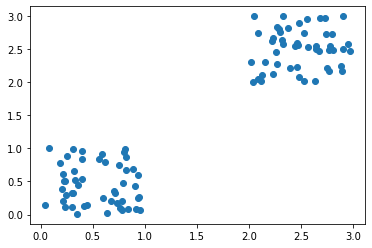

In [4]:
#%% plot the data points
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=df['xpt'], y=df['ypt'])
plt.show()

In [5]:
#%% clustering, cluster labels: 0, 1
kmeans = KMeans(n_clusters=2, random_state=0).fit(Z)

#%% extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_
centroids = pd.DataFrame(centers,columns=['xpt','ypt'])

#%% extract cluster labels
lab = kmeans.labels_

#%% add cluster information to the dataframe
df['lab']=lab

In [8]:
centers

array([[0.54154015, 0.45654563],
       [2.48874101, 2.50214786]])

In [6]:
#%% glimpse at the 'labeled' data
df.head()

,xpt,ypt,lab
0,0.785941,0.066482,0
1,0.216367,0.201646,0
2,0.304065,0.323092,0
3,0.301106,0.111798,0
4,0.730091,0.177581,0


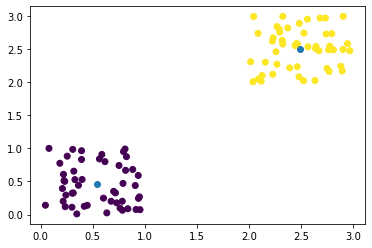

In [9]:
#%% plot the 'labeled' data with centroids
# create a figure and axes
fig, ax = plt.subplots(figsize=(6,4))

# add data points
ax.scatter(x=df['xpt'], y=df['ypt'], c=df['lab'])

# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])
plt.show()

#%% calculate the maximum radius around earch cluster
radii = [cdist(df[lab == i].iloc[:,[0,1]], [center]).max() for i, center in enumerate(centers)]

In [12]:
#%% glimpse at the found radii
radii

[0.616514801078022, 0.7065842519440552]

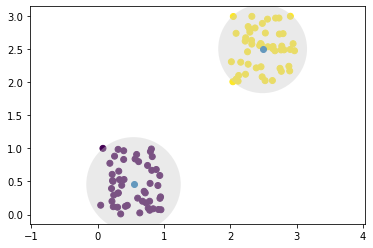

In [12]:
#%% display clusters’ zones
# create a figure and axes
fig, ax = plt.subplots(figsize=(6,4))

# add data points
ax.scatter(x=df['xpt'], y=df['ypt'], c=df['lab'])

# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])

# set the axis scale on both axes equally
ax.axis('equal')

# draw a circle around each cluster centroid (lw: linewidth, alpha: transparency level)
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.4))

# show the plot 
plt.savefig("kmeans.pdf")
plt.show()


## 2. Elbow criterion

In [ ]:
#Install yellowbrick package, run only one time
# pip install yellowbrick
#Install using Anaconda, run at command prompt
#conda install -c districtdatalabs yellowbrick

In [13]:
#%% import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [14]:
#%% create sample data
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))

In [19]:
#%% create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8), timings=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


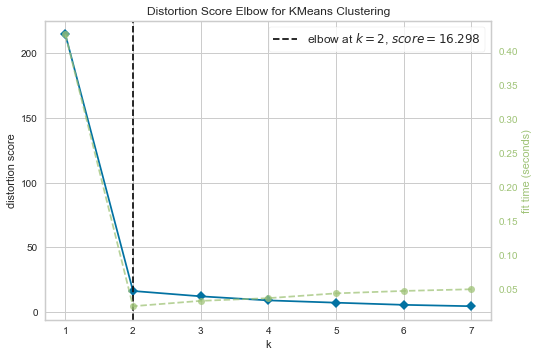

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
#%% fit the visualizer and show the plot
visualizer.fit(Z)        
visualizer.show()   

## 3. Silhouette score

In [27]:
#%% import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [28]:
#%% generate sample data
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))

In [29]:
#%% conduct a k-Means clustering
model = KMeans(n_clusters=2, random_state=0).fit(Z)

#%% extract labels, i.e. cluster associations
lab=model.labels_

In [30]:
#%% calculate the overall Silhouette score
S = silhouette_score(Z, lab)
print(S)

0.8157311922846238


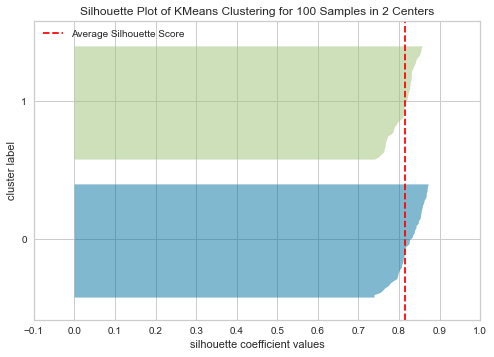

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 100 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
#%% generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(Z)        
visualizer.show()

## 4. Gaussian Mixture model

In [21]:
#%% import libraries
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt

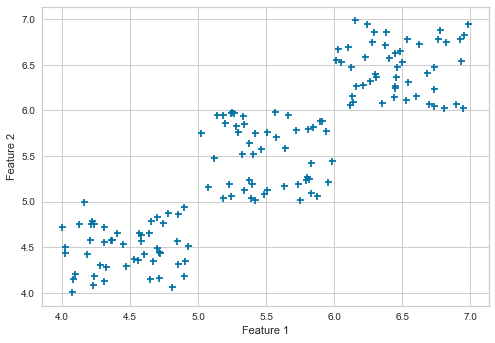

In [22]:
#%% generate sample data
X1 = 4 + np.random.rand(50,2)
X2 = 5 + np.random.rand(50,2)
X3 = 6 + np.random.rand(50,2)
Z = np.concatenate((X1,X2,X3))

#%% plot the sample data
plt.scatter(Z[:, 0], Z[:, 1], marker='+')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [23]:
#%% specify Gaussian Mixture Model
gmm = mixture.GaussianMixture(n_components=3)

#%% fit the model
gmm.fit(Z)

GaussianMixture(n_components=3)

In [24]:
#%%
# extract the clusters predictions according to
# the highest probability
labels = gmm.predict(Z)

#%% show the predicted labels
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
#%% extract the probabilities to belong to a cluster
probs = gmm.predict_proba(Z)
print(probs)

[[9.99992227e-01 7.77299522e-06 2.35609801e-21]
 [9.99999809e-01 1.90725414e-07 4.01422356e-22]
 [9.99896720e-01 1.03280132e-04 1.50882853e-18]
 [9.99993791e-01 6.20892985e-06 4.25392021e-19]
 [9.91379023e-01 8.62097743e-03 5.82772504e-14]
 [9.99999999e-01 6.37184084e-10 2.27708067e-27]
 [9.99999951e-01 4.91408143e-08 5.53384501e-23]
 [9.99962501e-01 3.74986739e-05 8.15120071e-19]
 [9.99713596e-01 2.86403561e-04 1.03911369e-17]
 [9.99999999e-01 6.02532063e-10 2.97328409e-26]
 [1.00000000e+00 1.86180688e-10 9.87362602e-28]
 [9.98232754e-01 1.76724641e-03 3.61147924e-15]
 [9.99998675e-01 1.32461988e-06 7.79358327e-21]
 [9.99154248e-01 8.45751605e-04 2.90713091e-16]
 [9.99999375e-01 6.24689178e-07 6.31144199e-21]
 [9.99913145e-01 8.68550181e-05 1.17805427e-17]
 [9.99999999e-01 1.13175184e-09 1.10922764e-25]
 [9.99997330e-01 2.66954559e-06 4.33718263e-20]
 [8.98362946e-01 1.01637054e-01 5.08471932e-12]
 [9.99965395e-01 3.46045669e-05 7.67772644e-19]
 [9.99985023e-01 1.49765507e-05 4.296922

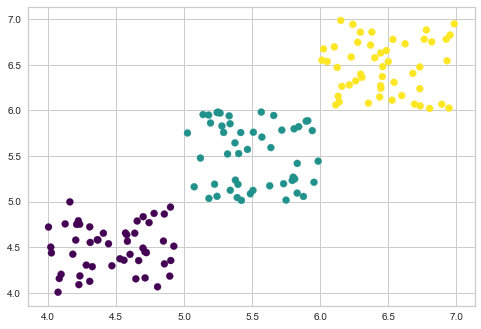

In [26]:
#%% show results visually
plt.scatter(x=Z[:,0], y=Z[:,1], c=labels, cmap='viridis')
plt.show()

## 5. Gaussian Mixture Model clustering, choosing the number of clusers, k

In [32]:
#%% import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.metrics import silhouette_score

In [33]:
#%% generate sample data
X1 = 4 + np.random.rand(50,2)
X2 = 5 + np.random.rand(50,2)
X3 = 6 + np.random.rand(50,2)
Z = np.concatenate((X1,X2,X3))

In [34]:
#%%
# calculate the Silhouette score and BIC
# for the number of clusters, k = 2 to 6
S = []
bic = []
n_cluster_range = [2, 3, 4, 5, 6]
for n_cluster in n_cluster_range:
    gmm = mixture.GaussianMixture(n_components=n_cluster)
    gmm.fit(Z)
    lab = gmm.predict(Z)
    S.append(silhouette_score(Z, lab))
    bic.append(gmm.bic(Z))

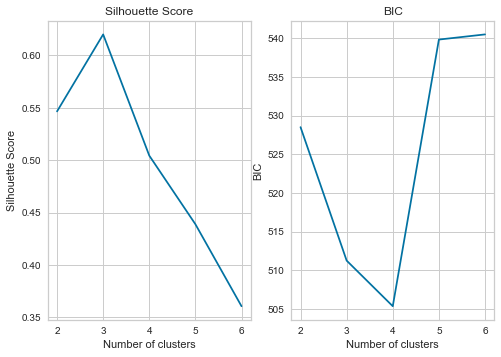

In [33]:
#%% show the resuls visuallay
# figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# first plot: Silhouette score
ax1.plot(n_cluster_range, S)
ax1.set_title('Silhouette Score')
ax1.set(xlabel='Number of clusters',   ylabel='Silhouette Score')

# second plot: BIC
ax2.plot(n_cluster_range, bic)
ax2.set_title('BIC')
ax2.set(xlabel='Number of clusters',  ylabel='BIC')

plt.show()

## 6. GMM - Sample generation

In [35]:
#%% import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

In [36]:
#%% generate sample data
X1 = 4 + np.random.rand(50,2)
X2 = 5 + np.random.rand(50,2)
X3 = 6 + np.random.rand(50,2)
Z = np.concatenate((X1,X2,X3))

In [37]:
#%% Build and fit a GMM model with k = 3 cluster
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(Z)

GaussianMixture(n_components=3)

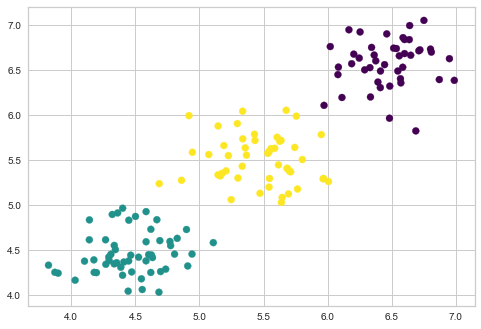

In [38]:
#%% generate new samples
newdata = gmm.sample(150)

#%% extract the feature values, i.e. coordinates
vals = newdata[0]

#%% extract the labels
labs = newdata[1]

#%% plot the generated samples 
plt.scatter(x=vals[:,0], y=vals[:,1], c=labs, cmap='viridis')
plt.show()

## 7. Hierarchical Clustering

In [39]:
#%% import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering

In [40]:
#%% generate sample data
X1 = np.random.rand(5,2)
X2 = 2 + np.random.rand(5,2)
X3 = 3 + np.random.rand(5,2)
Z = np.concatenate((X1,X2,X3))

In [41]:
#%% calculate distances
linkage_array = ward(Z)

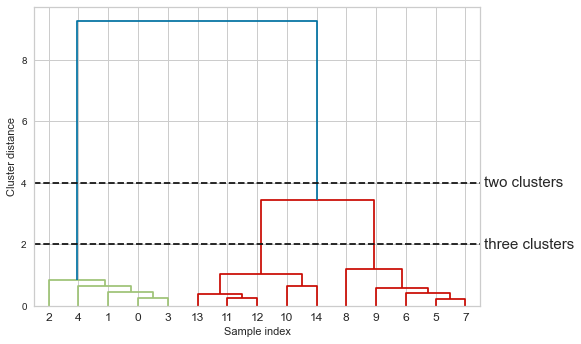

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [42]:
#%% visualize the dendrogram
# create a dendrogram
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()

# add the boundary for two/three clusters
ax.plot(bounds, [4, 4], '--', c='k')
ax.plot(bounds, [2, 2], '--', c='k')

# add an annotation to the marked boundary
ax.text(bounds[1], 4, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 2, ' three clusters', va='center', fontdict={'size': 15})

# label the axes
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# show the plot
plt.show()

#%% execute agglomerative clusering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)

# predict clusters
labs = agg.fit_predict(Z)

print(labs)